In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [6]:
#Other method to get data from the online data
#df_feat = pd.DataFrame(boston['data'],columns=boston['feature_names'])
#df_feat.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [29]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
print(y.shape)

(506,)


In [25]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [11]:
print(y.shape)

(506,)


In [12]:
#Split Traninign and Split data
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [14]:
#Call Linear regression 
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()

In [16]:
#Fit the traning data
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
#Coefficients of the features
lm.coef_

array([-7.75583711e-02,  4.20310157e-02,  9.11529473e-02,  4.13304932e+00,
       -1.99765575e+01,  2.89019042e+00,  1.61533256e-02, -1.26474745e+00,
        2.60170760e-01, -1.11251993e-02, -8.80555502e-01,  7.02445445e-03,
       -6.43482813e-01])

In [18]:
# print the intercept
print(lm.intercept_)

41.281496544739696


In [26]:
coeff_df = pd.DataFrame(lm.coef_,boston['feature_names'],columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.077558
ZN,0.042031
INDUS,0.091153
CHAS,4.133049
NOX,-19.976557
RM,2.890190
AGE,0.016153
DIS,-1.264747
RAD,0.260171
TAX,-0.011125


In [30]:
#Predictions
predictions = lm.predict(X_test)

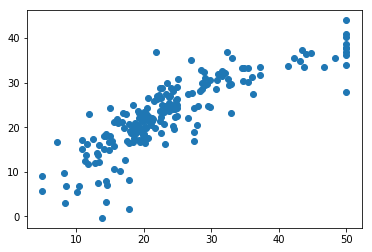

In [31]:
#Scatter_plot
plt.scatter(y_test,predictions)

C:\Users\sachi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


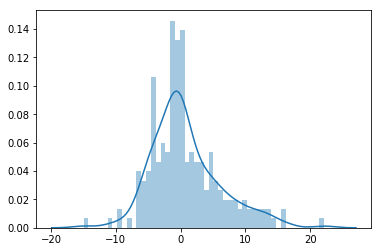

In [32]:
sns.distplot((y_test-predictions),bins=50);

In [33]:
from sklearn import metrics

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.9013241932147276
MSE: 29.412643812352652
RMSE: 5.423342494472634
